In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from functions import criar_Perceptron,criar_MLP,dividir_dados
import os
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

2025-01-23 16:19:10.642269: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-23 16:19:10.659298: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-23 16:19:10.664177: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-23 16:19:10.675898: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dados = pd.read_csv("dados/dados_imperfeito_uniforme.csv")
del dados['Unnamed: 0']
dados

,comprimento de onda,cor
0,459.946016,azul
1,457.930831,azul
2,458.864739,azul
3,460.923299,azul
4,461.383151,azul
...,...,...
195,584.493567,verde
196,587.661764,verde
197,584.530100,verde
198,587.665023,verde


In [3]:
# Cria a camada de normalização
normalization_layer = keras.layers.Normalization(axis=-1)

# Adapta a camada aos dados (necessário para calcular a média e o desvio padrão)
normalization_layer.adapt(dados['comprimento de onda'].values.reshape(-1, 1))

I0000 00:00:1737659952.894208   13786 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737659952.948474   13786 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737659952.948760   13786 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737659952.950073   13786 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [4]:
encoder = OneHotEncoder()
cor_encoded = encoder.fit_transform(dados['cor'].values.reshape(-1,1))
cor_encoded.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [5]:
dados['cor encoded'] = cor_encoded.toarray()[:,0].copy()
dados

,comprimento de onda,cor,cor encoded
0,459.946016,azul,1.0
1,457.930831,azul,1.0
2,458.864739,azul,1.0
3,460.923299,azul,1.0
4,461.383151,azul,1.0
...,...,...,...
195,584.493567,verde,0.0
196,587.661764,verde,0.0
197,584.530100,verde,0.0
198,587.665023,verde,0.0


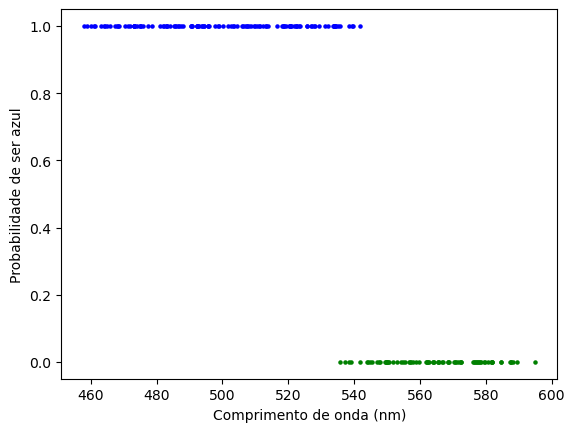

In [6]:
azul = dados[dados['cor']=='azul']
verde = dados[dados['cor']=='verde']

plt.scatter(azul['comprimento de onda'],azul['cor encoded'],color='blue',s=5)
plt.scatter(verde['comprimento de onda'],verde['cor encoded'],color='green',s=5)
plt.ylabel('Probabilidade de ser azul')
plt.xlabel('Comprimento de onda (nm)')
plt.savefig('imagens/conjunto de dados com ruído uniforme.png')

In [7]:
dados

,comprimento de onda,cor,cor encoded
0,459.946016,azul,1.0
1,457.930831,azul,1.0
2,458.864739,azul,1.0
3,460.923299,azul,1.0
4,461.383151,azul,1.0
...,...,...,...
195,584.493567,verde,0.0
196,587.661764,verde,0.0
197,584.530100,verde,0.0
198,587.665023,verde,0.0


In [8]:
x_train,y_train,x_test,y_test,strat_train_set,strat_test_set = dividir_dados(dados)

In [9]:
learning_rate_exponent = 3

path_perceptron = f'modelos/perceptron_uniforme_{learning_rate_exponent}.keras'
path_mlp = f'modelos/MLP_uniforme_{learning_rate_exponent}.keras'

if not os.path.exists(path_mlp):
    MLP = criar_MLP(x_train, strat_train_set, 1 / 10**learning_rate_exponent)
    MLP.save(path_mlp)
else:
    MLP = keras.models.load_model(path_mlp)
if not os.path.exists(path_perceptron):
    Perceptron = criar_Perceptron(x_train,strat_train_set,learning_rate=1/10**learning_rate_exponent)
    Perceptron.save(path_perceptron)
else:
    Perceptron = keras.models.load_model(path_perceptron)

In [10]:
MLP.fit(x_train,y_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9486 - loss: 0.3512  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9647 - loss: 0.3451 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9634 - loss: 0.3570 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9543 - loss: 0.3388 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.3454 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9456 - loss: 0.3410 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9534 - loss: 0.3466 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9582 - loss: 0.3277 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9299 - loss: 0.3398 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9569 - loss: 0.3404 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9490 - loss: 0.3339 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9590 - lo

In [11]:
Perceptron.fit(x_train,y_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1997 - loss: 0.8405  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1559 - loss: 0.8523 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1780 - loss: 0.8405 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1813 - loss: 0.8483 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2117 - loss: 0.8241 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1909 - loss: 0.8340 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2052 - loss: 0.8253 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2191 - loss: 0.8244 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1874 - loss: 0.8235 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1974 - loss: 0.8220 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2013 - loss: 0.8154 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1831 - lo

In [12]:
np.argmax(Perceptron.predict(x_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
resultado = np.argmax(y_test,axis=1)
predito = np.argmax(MLP.predict(x_test),axis=1)


# Calcula a acurácia diretamente
accuracy = np.mean(resultado == predito)
print(f"Acurácia com mlp: {accuracy}")

predito = np.argmax(Perceptron.predict(x_test),axis=1)

accuracy = np.mean(resultado==predito)

print(f'Acurácia do Perceptron: {accuracy}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Acurácia com mlp: 0.9
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Acurácia do Perceptron: 0.625


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


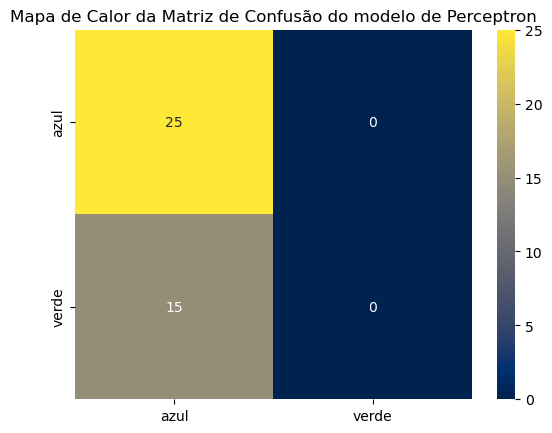

In [14]:
labels = ('azul','verde')
predito = np.argmax(Perceptron.predict(x_test),axis=1)
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de Perceptron"
plt.title(title)
plt.savefig(f'imagens/{title}_uniforme.png')

In [15]:
predito = np.argmax(MLP.predict(x_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


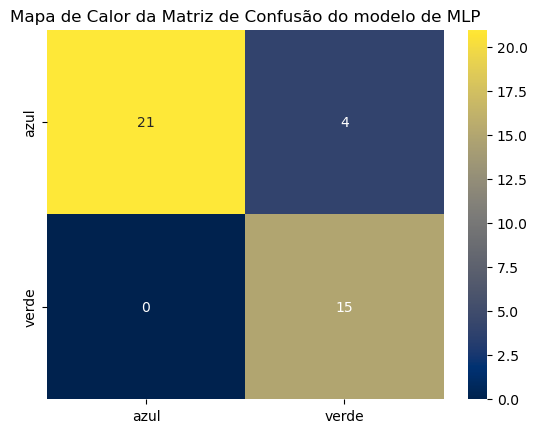

In [16]:
labels = ('azul','verde')
predito = np.argmax(MLP.predict(x_test),axis=1)
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de MLP"
plt.title(title)
plt.savefig(f'imagens/{title}_uniforme.png')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


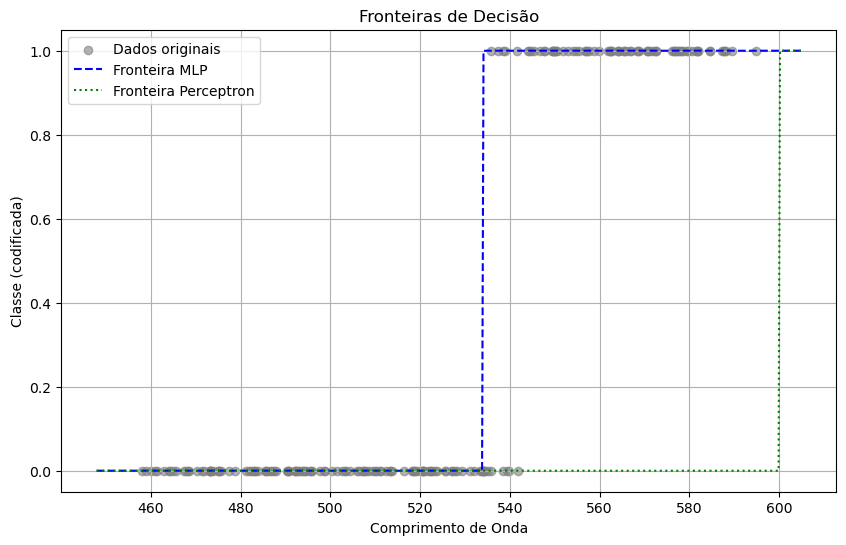

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Gera uma malha de pontos
x_min, x_max = dados['comprimento de onda'].min() - 10, dados['comprimento de onda'].max() + 10
xx = np.linspace(x_min, x_max, 500).reshape(-1, 1)

# Predição para os modelos
mlp_pred = np.argmax(MLP.predict(xx), axis=1)
perceptron_pred = np.argmax(Perceptron.predict(xx), axis=1)

# Converte as classes para rótulos
encoder = LabelEncoder()
encoder.fit(['azul', 'verde'])

# Plota as fronteiras de decisão
plt.figure(figsize=(10, 6))
plt.scatter(dados['comprimento de onda'], encoder.transform(dados['cor']), c='gray', label='Dados originais', alpha=0.6)
plt.plot(xx, mlp_pred, label="Fronteira MLP", color="blue", linestyle="--")
plt.plot(xx, perceptron_pred, label="Fronteira Perceptron", color="green", linestyle=":")
plt.title("Fronteiras de Decisão")
plt.xlabel("Comprimento de Onda")
plt.ylabel("Classe (codificada)")
plt.legend()
plt.grid(True)
plt.savefig("imagens/fronteiras_decisao.png")
plt.show()


In [18]:
learning_rate_exponent = 3

Perceptron.save(f'modelos/perceptron_uniforme_{learning_rate_exponent}.keras')
MLP.save(f'modelos/MLP_uniforme_{learning_rate_exponent}.keras')